# MA999 - Agent based modelling 2 : the Schelling Model

## MathSys CDT 2023

### Lecturer: Paolo Turrini 
(thanks to Colm Connaughton and Stas Zhydkov) 

## Origin of the Schelling Model

The Schelling model is a simple model of social segregation. 

<a href="https://www.uzh.ch/cmsssl/suz/dam/jcr:00000000-68cb-72db-ffff-ffffff8071db/04.02%7B_%7Dschelling%7B_%7D71.pdf">
Schelling, Thomas C. "*Dynamic models of segregation.*" Journal of mathematical sociology 1.2 (**1971**): 143-186.
</a>

Aim is to understand the social segregation that was a feature of US cities in the 1960's.

One of the earliest computational social science models

## The model

* Agents belong to one of two groups (0 or 1).
* The agents live in a two-dimensional $N \times N$ grid with 8 neighboring positions per position (Chebyshev metric).
* Each position of the grid can be occupied by at most one agent or empty.
* If an agent has at least $n_\text{happy}$ neighbors belonging to the same group, then it is content.
* If an agent is discontent, it keeps moving to new locations until it is content.

Many variations.


## Findings

* A priori one might expect that segregation results when agents prefer locations where a majority of their neighbours are of the same group ($n_\text{happy} >4$ in this case).
* Simulations show that even for $n_\text{happy} = 3$, strong segregation develops over time.
* Schelling's work demonstrates that "mild" in-group preference towards one's own group can still lead to a highly segregated society.

## How to quantify segregation?

* Suppose the group of agent $i$ is $g_i$ and the neighbours of agent $i$ are $\mathcal{N}_i$:
* Proportion of "out-group" links for agent $i$ is

$$ s_i = \frac{\sum_{j \in \mathcal{N}_i} \left( 1 - \delta_{g_i\,g_j} \right)}{\left|\mathcal{N}_i \right|}$$

* Average of $s_i$ over all the agents is called the interface density:

$$S = \frac{\sum_{i=1}^{N^2} s_i}{N^2} $$.

## Building the model

We need to define:

* agent
* space
* agent update rule 1 (to decide the movement)
* agent update rule 2 (to calculate the interface density *after* all agents have had an opportunity to move)

In [ ]:
%pwd

In [ ]:
%cd .

In [ ]:
import mesa
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import sys
sys.path.append('./code')
print(os.getcwd())
import Schelling

## Running the model and extracting data

In [4]:
N = 100
vac = 0.1
results = {}
for threshold in [1, 2, 3, 4]:
    print(f"Running model with min_to_be_happy = {threshold}")
    model = Schelling.Schelling(width=N, height=N, num_agents=int(N*N*(1-vac)), min_to_be_happy=threshold)
    for i in range(100):
        model.step()
    results[threshold] = model.datacollector.get_model_vars_dataframe()

Running model with min_to_be_happy = 1
Running model with min_to_be_happy = 2
Running model with min_to_be_happy = 3
Running model with min_to_be_happy = 4


## The interface density

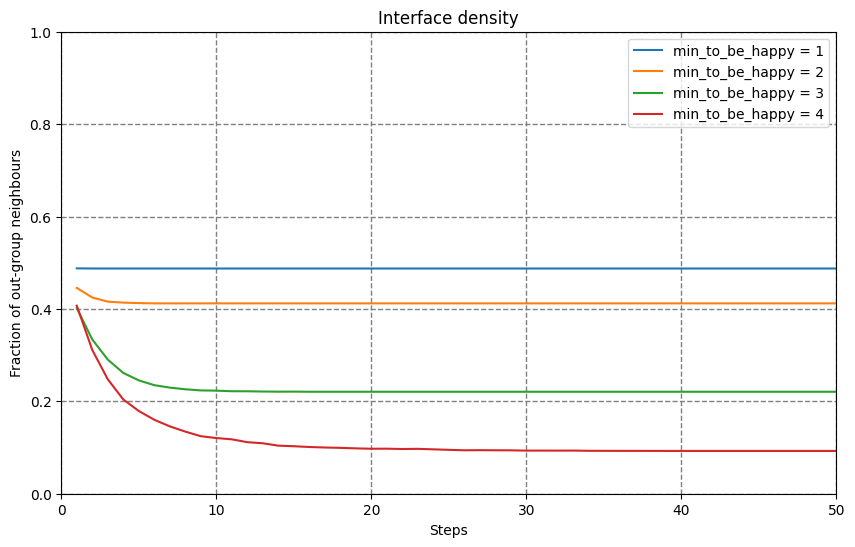

In [5]:
plt.figure(figsize=(10, 6))
for threshold, data in results.items():
    plt.plot(data['mean_interfaces'][1:], label=f'min_to_be_happy = {threshold}')

plt.ylim(0, 1)
plt.xlim(0, 50)
plt.title('Interface density')
plt.xlabel('Steps')
plt.ylabel('Fraction of out-group neighbours')
plt.grid(axis='both', color='0.5', linestyle='--', linewidth=1)
plt.legend()
plt.show()

## Visualising the dynamics of the model

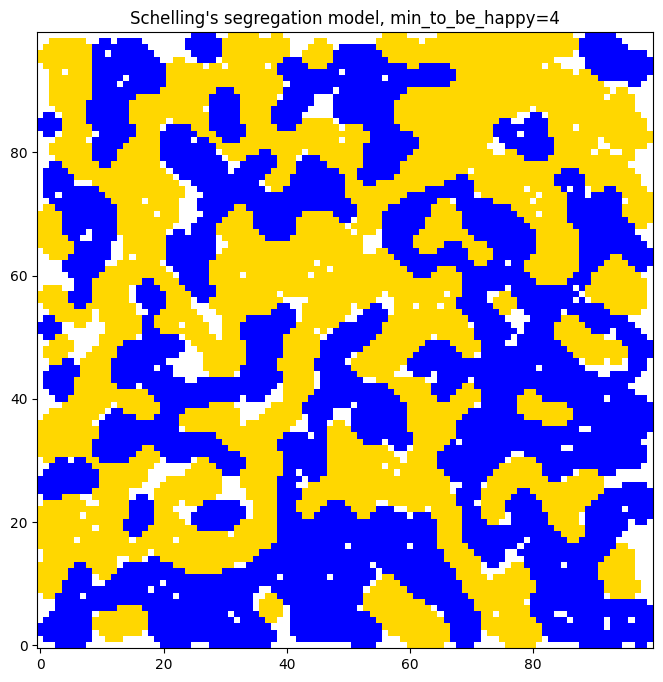

In [6]:
model = Schelling.Schelling(width=N, height=N, num_agents=int(N*N*(1-vac)), min_to_be_happy=4)
for i in range(100):
    model.step()

agent_grid = np.zeros((model.grid.width, model.grid.height))
for agent in model.agents:
    x, y = agent.pos
    agent_grid[x][y] = agent.type

plt.figure(figsize=(8, 8))
cmap = plt.cm.colors.ListedColormap(['white', 'blue', 'gold'])
bounds = [-0.5, 0.5, 1.5, 2.5]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)
plt.imshow(agent_grid.T, interpolation='nearest', cmap=cmap, norm=norm, origin='lower')
plt.title("Schelling's segregation model, min_to_be_happy=4")
plt.show()

## Making animations

In [21]:
from matplotlib import animation

import imageio_ffmpeg
plt.rcParams["animation.ffmpeg_path"] = imageio_ffmpeg.get_ffmpeg_exe()

# Set up the model
min_to_be_happy = 4
model = Schelling.Schelling(width=N, height=N, num_agents=int(N*N*(1-vac)), min_to_be_happy=min_to_be_happy)

# Set up the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.set_xticks([])
ax.set_yticks([])
cmap = plt.cm.colors.ListedColormap(['white', 'blue', 'gold'])
bounds = [-0.5, 0.5, 1.5, 2.5]
norm = plt.cm.colors.BoundaryNorm(bounds, cmap.N)

# Define the animation update function
def update(frame):
    model.step()
    ax.clear()
    agent_grid = np.zeros((model.grid.width, model.grid.height))
    for agent in model.agents:
        x, y = agent.pos
        agent_grid[x][y] = agent.type
    
    im = ax.imshow(agent_grid.T, interpolation='nearest', cmap=cmap, norm=norm, origin='lower')
    ax.set_title(f"Schelling's segregation model, min_to_be_happy={min_to_be_happy} (Step {frame+1})")
    return [im]

# Create and save the animation
ani = animation.FuncAnimation(fig, update, frames=100, interval=250, blit=True)
plt.close(fig) # prevent final frame from displaying in notebook

ani.save(f"animations/schelling_happy_{min_to_be_happy}.mp4", writer="ffmpeg")
# ani.save(f"animations/schelling_happy_{min_to_be_happy}.html", writer="html")
print("Animation saved")

Animation saved


In [10]:
from IPython.display import Video

Video(f"animations/schelling_happy_{min_to_be_happy}.mp4")

In [18]:
# from IPython.display import HTML

# # Set up the model
# model = Schelling.Schelling(width=N, height=N, num_agents=int(N*N*(1-vac)), min_to_be_happy=min_to_be_happy)

# # Set up the plot
# fig, ax = plt.subplots(figsize=(8, 8))
# ax.set_xticks([])
# ax.set_yticks([])

# # Create and display the animation
# ani = animation.FuncAnimation(fig, update, frames=100, interval=250, blit=True)
# plt.close(fig) # prevent final frame from displaying in notebook

# HTML(ani.to_jshtml())

## Discussion

* What have we learned from this model? 
* Do you believe it?
* Can you think of useful variations on the model?
* Can you think of other problem domains where these ideas might be relevant?